In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("linear_regression_dataset.csv")
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [ ]:
print(df.isnull().sum())

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64


In [ ]:
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


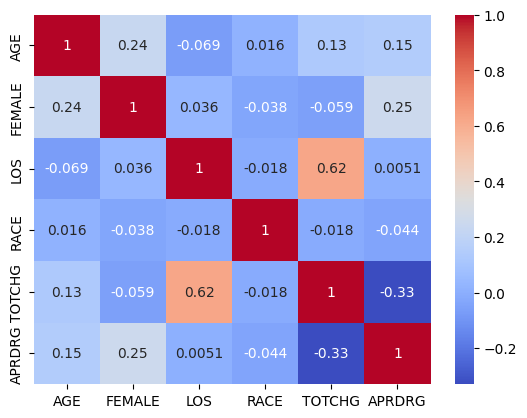

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

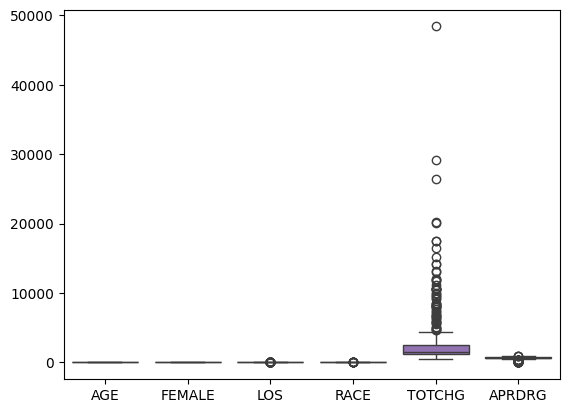

In [ ]:
sns.boxplot(data=df)
plt.show()

In [ ]:

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


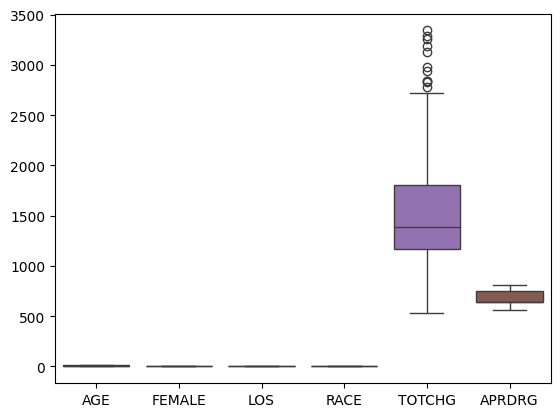

In [ ]:
sns.boxplot(data=df)
plt.show()

In [ ]:
print(df["RACE"].describe())  # Check count, mean, std
print(df["RACE"].isna().sum())  # Check for NaNs
print(df["RACE"].nunique())  # Check unique values

count    369.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: RACE, dtype: float64
0
1


In [ ]:
# Q1 = df["TOTCHG"].quantile(0.25)
# Q3 = df["TOTCHG"].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df = df[(df["TOTCHG"] >= lower_bound) & (df["TOTCHG"] <= upper_bound)]
# df


In [ ]:
race_column = df["RACE"]
df = df.drop(columns=["RACE"])

In [ ]:
X = df.drop(columns=["TOTCHG"])  
y = df["TOTCHG"]  

In [ ]:
X = (X - X.mean()) / X.std()
X

,AGE,FEMALE,LOS,APRDRG
0,1.915350,0.923015,-0.284941,-2.056590
1,1.915350,-1.080470,-0.284941,1.540624
3,1.915350,0.923015,-1.536648,1.633816
4,1.915350,0.923015,-1.536648,1.559262
6,1.915350,0.923015,2.218473,1.559262
...,...,...,...,...
493,-0.619458,-1.080470,-0.284941,-0.565517
494,-0.619458,0.923015,0.966766,-0.565517
496,-0.619458,0.923015,-0.284941,-0.565517
497,-0.619458,0.923015,-0.284941,-0.565517


In [ ]:
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]



In [ ]:
# X_train = (X_train - X_train.mean()) / X_train.std()
# X_test = (X_test - X_train.mean()) / X_train.std()


In [ ]:
X_train.loc[:, "RACE"] = race_column.iloc[:split_index].values
X_test.loc[:, "RACE"] = race_column.iloc[split_index:].values

/var/folders/k7/w2tqyfns13x64vwpz_mbz7bh0000gn/T/ipykernel_61120/919434331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, "RACE"] = race_column.iloc[:split_index].values
/var/folders/k7/w2tqyfns13x64vwpz_mbz7bh0000gn/T/ipykernel_61120/919434331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, "RACE"] = race_column.iloc[split_index:].values


In [ ]:
X_train

,AGE,FEMALE,LOS,APRDRG,RACE
0,1.915350,0.923015,-0.284941,-2.056590,1.0
1,1.915350,-1.080470,-0.284941,1.540624,1.0
3,1.915350,0.923015,-1.536648,1.633816,1.0
4,1.915350,0.923015,-1.536648,1.559262,1.0
6,1.915350,0.923015,2.218473,1.559262,1.0
...,...,...,...,...,...
404,-0.619458,0.923015,-0.284941,-0.565517,1.0
406,-0.619458,-1.080470,-0.284941,-0.565517,1.0
407,-0.619458,0.923015,0.966766,-0.695986,1.0
408,-0.619458,-1.080470,-0.284941,-0.565517,1.0


In [ ]:
X_test

,AGE,FEMALE,LOS,APRDRG,RACE
411,-0.619458,-1.080470,0.966766,-0.565517,1.0
413,-0.619458,0.923015,-0.284941,-0.565517,1.0
414,-0.619458,0.923015,0.966766,-0.565517,1.0
415,-0.619458,0.923015,-0.284941,-0.565517,1.0
416,-0.619458,0.923015,0.966766,-0.565517,1.0
...,...,...,...,...,...
493,-0.619458,-1.080470,-0.284941,-0.565517,1.0
494,-0.619458,0.923015,0.966766,-0.565517,1.0
496,-0.619458,0.923015,-0.284941,-0.565517,1.0
497,-0.619458,0.923015,-0.284941,-0.565517,1.0


In [ ]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [ ]:
# def compute_cost(X_train, y_train, w, b):   
#     m,n = X_train.shape
#     cost = 0.0
#     for i in range(m):                                
#         f_wb_i = np.dot(X_train[i], w) + b           
#         cost = cost + (f_wb_i - y_train[i])**2
#     cost = cost / (2 * m)    
#     return cost                     

In [ ]:
## THIS IS TRAINING SET

iterations = 2800
alpha = 0.008
cost_calc = []
m,n = X_train.shape
w = np.zeros(n)
b = 0
tolerance = 1e-6
previous_cost = float("inf")

# for p in range(iterations):
#     dj_dw = np.zeros((n,))
#     dj_db = 0.

#     for i in range(m):                             
#         err = (np.dot(X_train[i], w) + b) - y_train[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * X_train[i, j]    
#         dj_db = dj_db + err                        
    
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m    
#     w = w - alpha*dj_dw
#     b = b - alpha*dj_db 

#     if i<100000:      
#             cost_calc.append( compute_cost(X_train, y_train, w, b))


for _ in range(iterations):
    err = np.dot(X_train, w.T) + b - y_train
    
    dj_dw = (1/m) * np.dot(X_train.T, err)  
    dj_db = (1/m) * np.sum(err)  

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    cost = (1/(2*m)) * np.sum(err**2)
    cost_calc.append(cost)

    if abs(previous_cost - cost) < tolerance:
        print(f"Early stopping at iteration {_}")
        break
    previous_cost = cost

        
print(dj_dw)
print(dj_db)

[-2.32157035  0.05994496  0.02332381  2.32075823 -0.01141941]
-0.011419412903258921


In [ ]:
## THIS IS TEST SET 

iteration = 2800
alph = 0.008
cost_calcu = []
p,q = X_test.shape
t = np.zeros(n)
r = 0
tol = 1e-6
previous_cost_test = float("inf")

# for p in range(iterations):
#     dj_dw = np.zeros((n,))
#     dj_db = 0.

#     for i in range(m):                             
#         err = (np.dot(X_train[i], w) + b) - y_train[i]   
#         for j in range(n):                         
#             dj_dw[j] = dj_dw[j] + err * X_train[i, j]    
#         dj_db = dj_db + err                        
    
#     dj_dw = dj_dw / m                                
#     dj_db = dj_db / m    
#     w = w - alpha*dj_dw
#     b = b - alpha*dj_db 

#     if i<100000:      
#             cost_calc.append( compute_cost(X_train, y_train, w, b))


for _ in range(iteration):
    erro = np.dot(X_test, t.T) + r - y_test
    
    dj_dw_i = (1/p) * np.dot(X_test.T, erro)  
    dj_db_i = (1/p) * np.sum(erro)  

    t = t - alph * dj_dw_i
    r = r - alph * dj_db_i

    costu = (1/(2*m)) * np.sum(erro**2)
    cost_calcu.append(costu)
    if abs(previous_cost_test - costu) < tol:
        print(f"Early stopping at iteration {_}")
        break
    previous_cost_test = costu
    
        
print(dj_dw_i)
print(dj_db_i)

[-0.2573718   0.02544913  0.03865733  0.25338421  0.0028347 ]
0.0028346953192625907


In [ ]:
print(w)
print(b)

print(t)
print(r)


[ 159.41160739  -75.54402372  417.0086709  -111.49052708  758.05760807]
758.0576080735902
[ 145.31894274  -68.02432592  455.42147194 -110.06075983  732.94954816]
732.9495481599491


In [ ]:
# iteration = 3000
# alph = 0.001
# [48.15139814 -59.59100856 392.01338674 -15.87456652 755.44591237]
# 755.4459123714284
# [ 53.32956575 -56.1225082  428.73677596 -99.21998393 715.43653479]
# 715.4365347928681

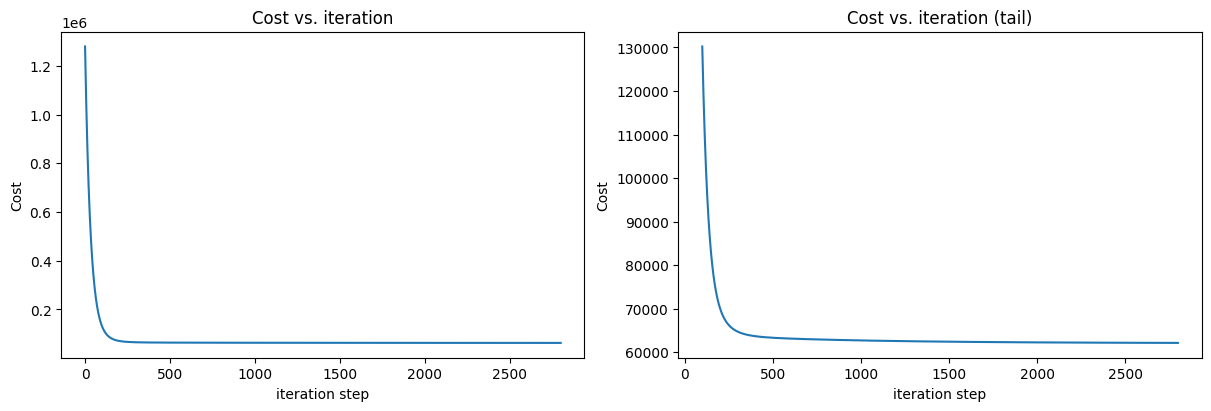

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_calc)
ax2.plot(100 + np.arange(len(cost_calc[100:])), cost_calc[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

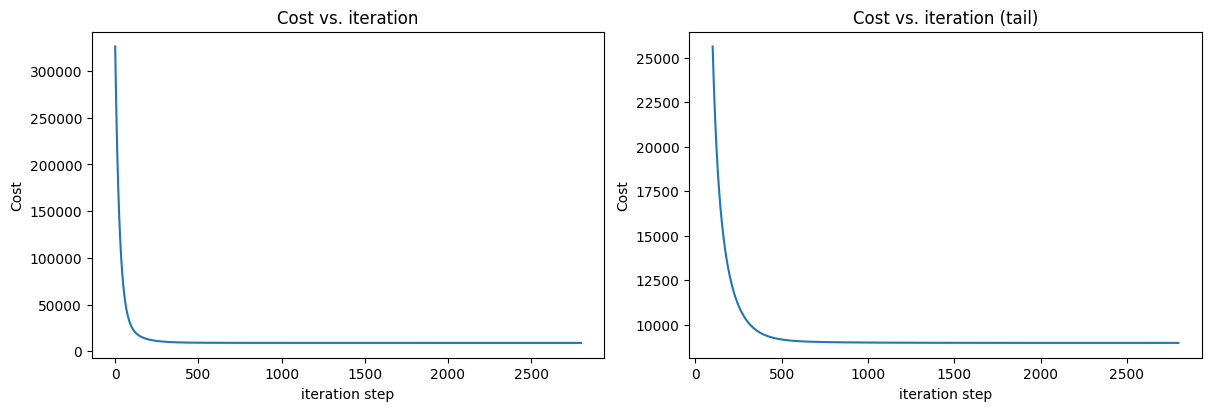

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_calcu)
ax2.plot(100 + np.arange(len(cost_calcu[100:])), cost_calcu[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [ ]:
## Linear Regression Model is:

In [ ]:
y_pred = np.array
y_pred = np.dot(X_test, w) + b

In [ ]:
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2_score = (1 - (ss_residual / ss_total))*100
print(f"R² Score: {r2_score}")

R² Score: 68.67005143703145


In [ ]:
# R² Score: 68.67005143703145
# AT epochs 2800 & alpha 0.008

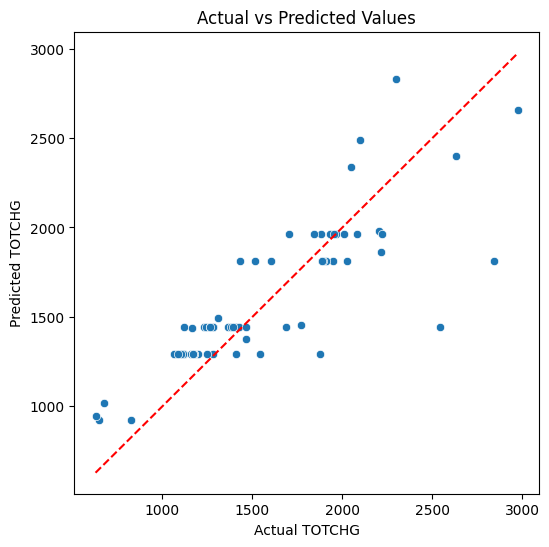

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual TOTCHG")
plt.ylabel("Predicted TOTCHG")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed') 
plt.show()